In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
%matplotlib inline

try:
    from google.colab import drive
    drive.mount('/content/gdrive')
    os.chdir("/content/gdrive/My Drive/Projects/QuantumFlow/notebooks/recreate")
except:
    pass

if tf.test.gpu_device_name() == '/device:GPU:0':
    print('Found GPU')

import ipywidgets as widgets
from IPython.display import Audio, HTML, display

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import sys
sys.path.append('../../')

from quantumflow.calculus_utils import integrate, integrate_simpson, laplace
from quantumflow.numerov_solver import unpack_dataset


In [1]:
datadir = "../../data"
dataset = "recreate_paper"
dataset_fine = "recreate_paper_fine"

N = 4
    
with open(os.path.join(datadir, dataset, 'dataset_training.pkl'), 'rb') as f:
    np_x, np_potentials, np_wavefunctions, np_energies, np_densities, np_kenergies, M, G, h = unpack_dataset(N, pickle.load(f))
    
with open(os.path.join(datadir, dataset_fine, 'dataset_training.pkl'), 'rb') as f:
    np_x_fine, np_potentials_fine, np_wavefunctions_fine, np_energies_fine, np_densities_fine, np_kenergies_fine, M_fine, G_fine, h_fine = unpack_dataset(N, pickle.load(f))

print("Dataset:", dataset)
print("unpacked with N =", N)
print("dataset size M:", M)
print("discretiation points G:", G)

print("\nDataset Fine:", dataset_fine)
print("unpacked with N =", N)
print("dataset size M:", M_fine)
print("discretiation points G:", G_fine)


NameError: ignored

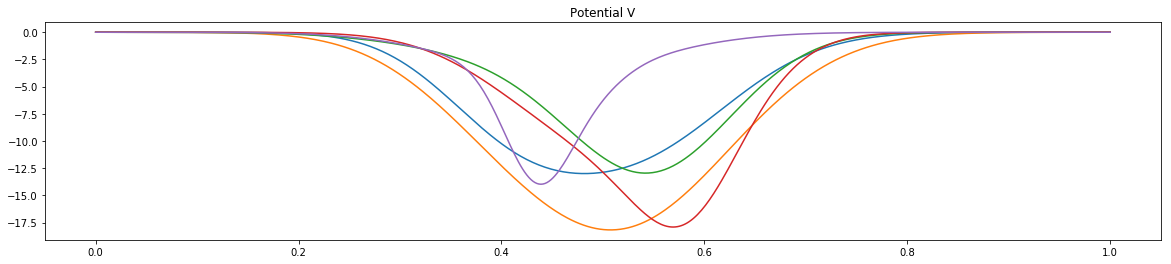

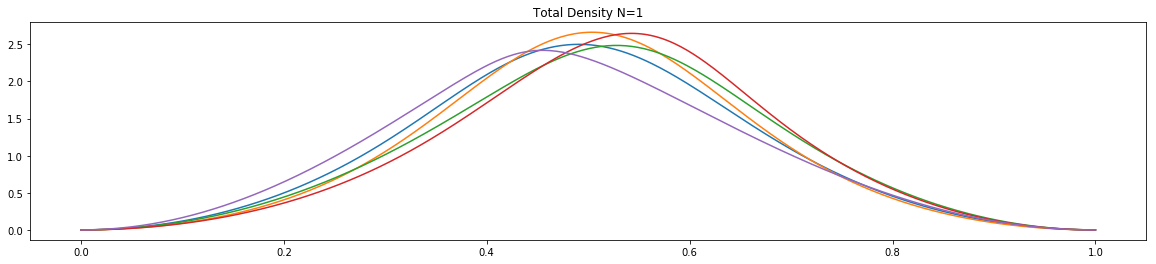

In [0]:
plt.figure(figsize=(20, 4))
plt.plot(np_x, np.transpose(np_potentials)[:, :5])
plt.title('Potential V')
plt.show()

plt.figure(figsize=(20, 4))
for i, np_plot in enumerate(np_densities[:5]):
    plt.plot(np_x, np_plot, 'C' + str(i%10))
plt.title('Total Density N=' + str(N))
plt.show()

In [0]:
print("discretisation coarse: G =", np_x.shape, np_x[0:2])
print("discretisation fine: G =", np_x_fine.shape, np_x_fine[0:11])
print("x discretization difference error: ", np.mean(np.abs(np_x_fine[0::10] - np_x)))

discretisation coarse: G = (500,) [0.         0.00200401]
discretisation fine: G = (4991,) [0.         0.0002004  0.0004008  0.0006012  0.0008016  0.001002
 0.0012024  0.00140281 0.00160321 0.00180361 0.00200401]
x discretization difference error:  3.8241979027908715e-17


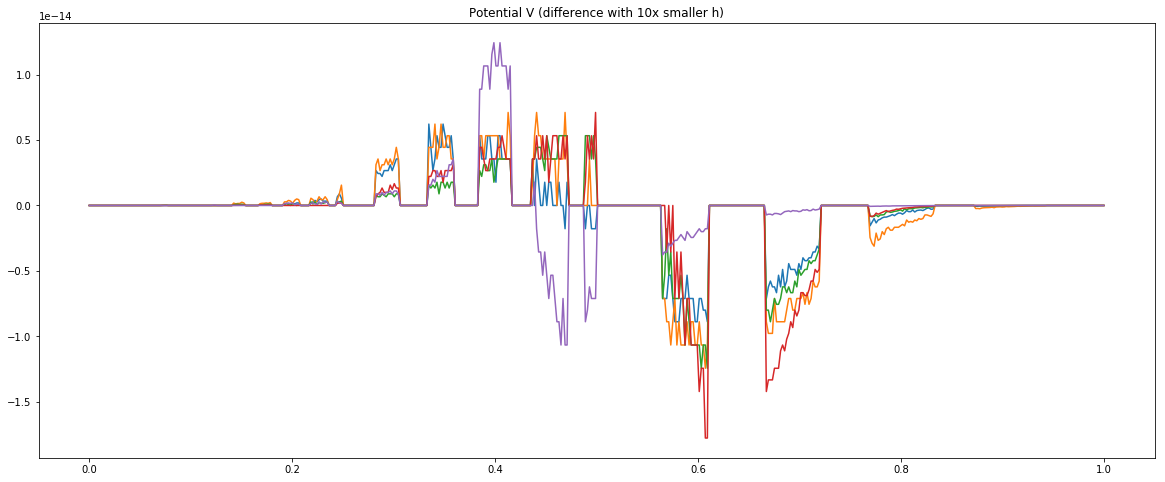

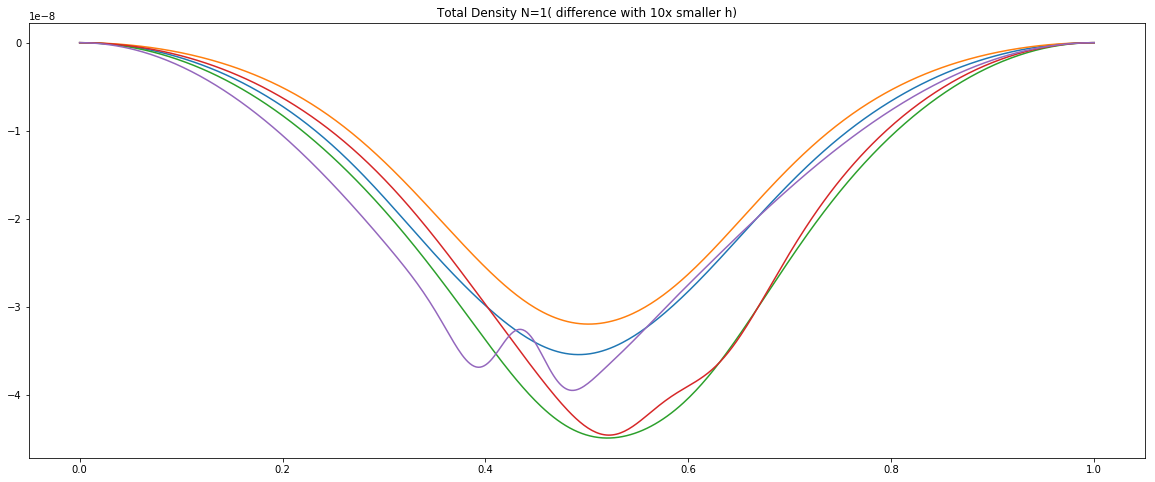

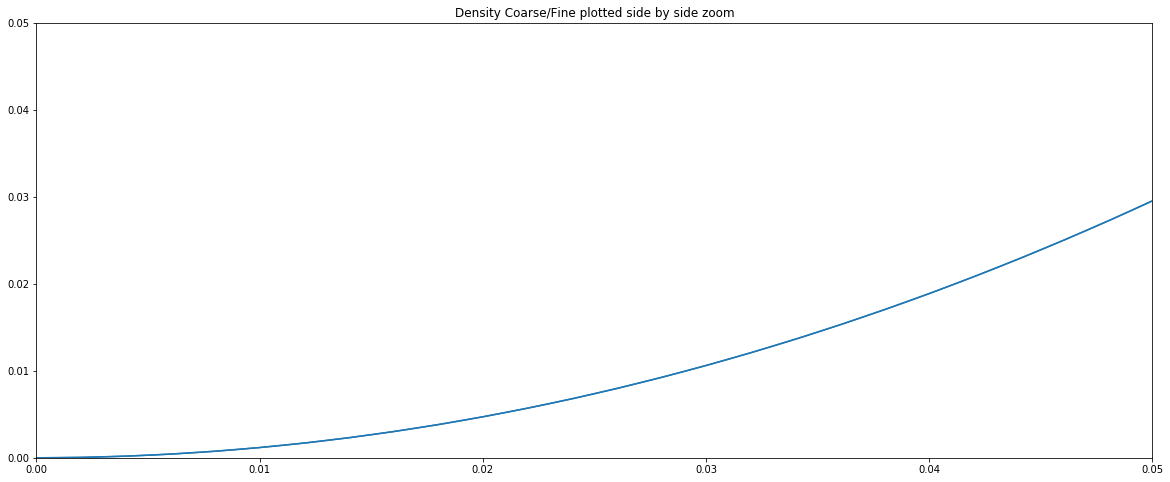

In [0]:
plt.figure(figsize=(20, 8))
plt.plot(np_x, np.transpose(np_potentials - np_potentials_fine[:, 0::10])[:, :5])
plt.title('Potential V (difference with 10x smaller h)')
plt.show()

plt.figure(figsize=(20, 8))
for i, np_density_group in enumerate((np_densities  - np_densities_fine[:, 0::10])[:5]):
    plt.plot(np_x, np_density_group, 'C' + str(i%10))
plt.title('Total Density N=' + str(N) + '( difference with 10x smaller h)')
plt.show()

plt.figure(figsize=(20, 8))
plt.plot(np_x, np_densities[0], 'C0')
plt.plot(np_x_fine, np_densities_fine[0], 'C0')
#np_kinetic_fine[:, 0::10, :]
plt.title('Density Coarse/Fine plotted side by side zoom')
plt.xlim([0.0, 0.05])
plt.ylim([0, 0.05])
plt.show()



Text(0.5, 1.0, 'Histogram of errors of T_j,N')

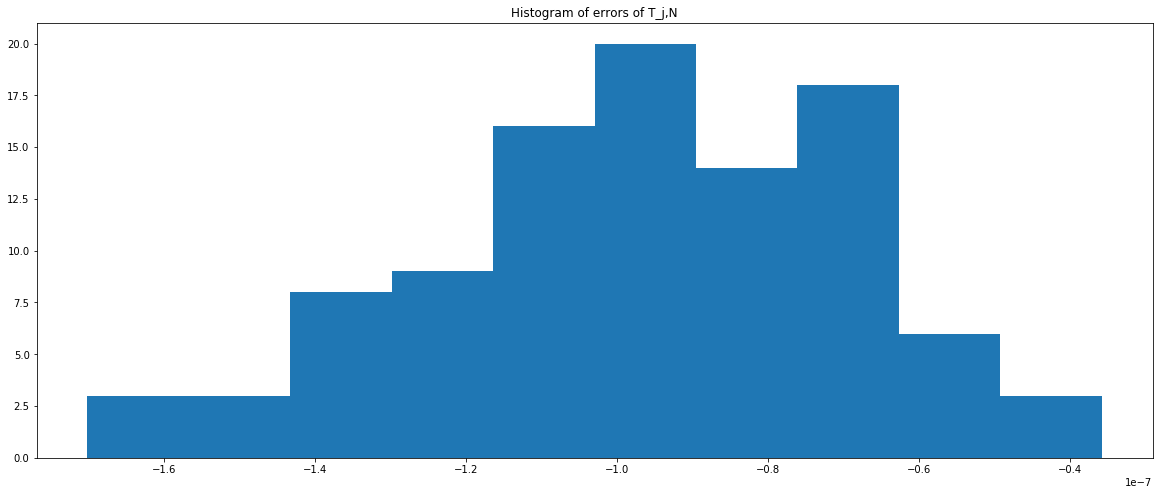

In [0]:
plt.figure(figsize=(20, 8))
plt.hist((np_kenergies - np_kenergies_fine).flatten())
plt.title('Histogram of errors of T_j,N')

In [0]:
print('min', np.min(np.abs(np_kenergies - np_kenergies_fine)))
print('mean', np.mean(np.abs(np_kenergies - np_kenergies_fine)))
print('max', np.max(np.abs(np_kenergies - np_kenergies_fine)))

min 3.583346863678116e-08
mean 9.642882849547618e-08
max 1.7021487419555115e-07


In [0]:
print('min', np.min(np.abs(np_energies - np_energies_fine)))
print('mean', np.mean(np.abs(np_energies - np_energies_fine)))
print('max', np.max(np.abs(np_energies - np_energies_fine)))

min 3.369127199448485e-11
mean 4.031747494373517e-08
max 1.352891274564172e-07


## Error of the kinetic energy in the range of 10^-6
## Error of the total energy is in the range of 10^-7
### Calculating the kinetic energy from the wavefunctions results in large errors

# Plots

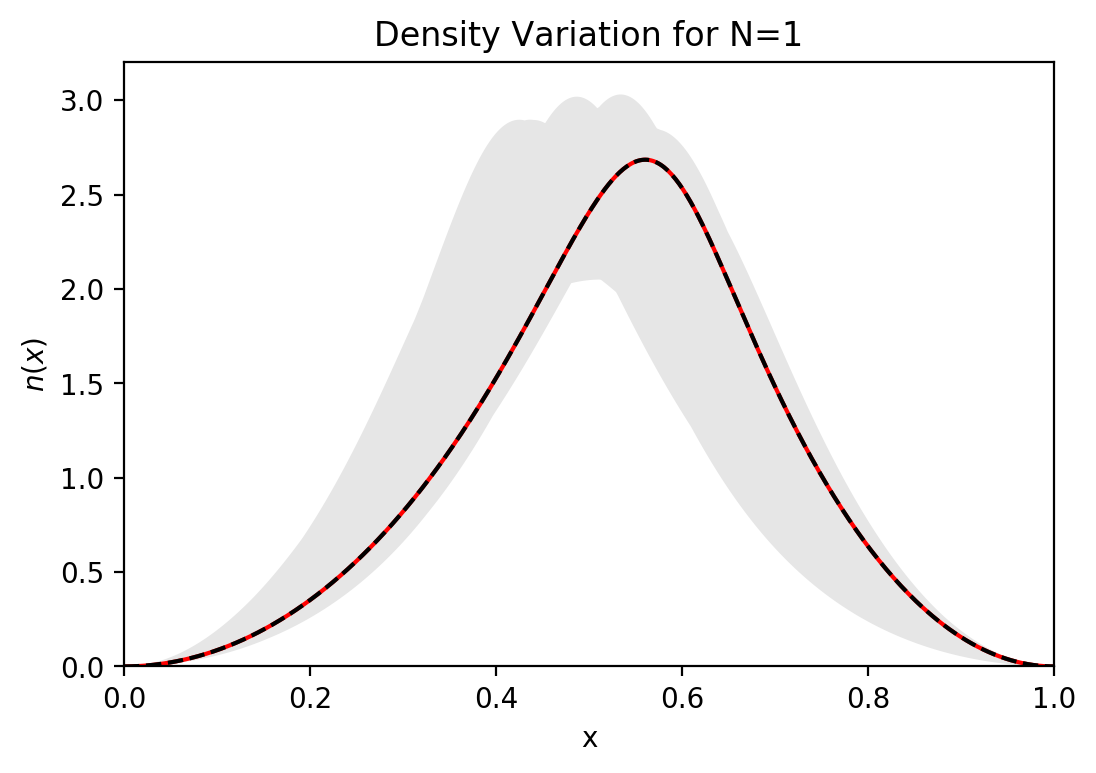

In [0]:
datadir = "../../data"
dataset = "recreate"

N = 1
    
with open(os.path.join(datadir, dataset, 'dataset_training.pkl'), 'rb') as f:
    np_x, np_potentials, np_wavefunctions, np_energies, np_densities, np_kenergies, M, G, h = unpack_dataset(N, pickle.load(f))
   
with open(os.path.join(datadir, 'recreate_paper', 'dataset_sample.pkl'), 'rb') as f:
    _, _, _, _, np_sample_density, _, _, _, _ = unpack_dataset(N, pickle.load(f))
    

plt.figure(figsize=(6, 4), dpi=200)
plt.fill_between(np_x, np.min(np_wavefunctions[:, :, 0]**2, axis=0), 
                       np.max(np_wavefunctions[:, :, 0]**2, axis=0), facecolor='0.9')

plt.plot(np_x, np.transpose(np_sample_density[0]), 'r') # TODO: plot an exact solution?
plt.plot(np_x, np.transpose(np_sample_density[0]), '--k') # TODO: plot a self-consistent density?

plt.title('Density Variation for N='+str(N))
plt.xlim([0, 1])
plt.ylim([0, 3.2])
plt.xlabel('x')
plt.ylabel('$n(x)$')
plt.show()

In [0]:
np.mean(np_kenergies.flatten()) # mean value of kinetic energy of N=1

5.403563849283007